In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence


In [2]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 250
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
accuracies = []

model_names = ["SimpleRNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        GRU(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
]

In [4]:
batch_size = 128
epochs = 3

histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(round(accuracy,1))

plt.figure(figsize=(10, 6))

Epoch 1/3
157/157 [==============================] - 15s 81ms/step - loss: 0.5815 - accuracy: 0.6816 - val_loss: 0.4415 - val_accuracy: 0.8052
Epoch 2/3
157/157 [==============================] - 10s 65ms/step - loss: 0.3582 - accuracy: 0.8490 - val_loss: 0.3729 - val_accuracy: 0.8360
Epoch 3/3
196/196 [==============================] - 4s 19ms/step - loss: 0.3689 - accuracy: 0.8409
Epoch 1/3
157/157 [==============================] - 37s 226ms/step - loss: 0.4937 - accuracy: 0.7469 - val_loss: 0.3790 - val_accuracy: 0.8328
Epoch 2/3
157/157 [==============================] - 35s 221ms/step - loss: 0.2658 - accuracy: 0.8954 - val_loss: 0.3032 - val_accuracy: 0.8774
Epoch 3/3
196/196 [==============================] - 13s 66ms/step - loss: 0.3596 - accuracy: 0.8624
Epoch 1/3
157/157 [==============================] - 40s 248ms/step - loss: 0.4602 - accuracy: 0.7677 - val_loss: 0.3048 - val_accuracy: 0.8764
Epoch 2/3
157/157 [==============================] - 39s 249ms/step - loss: 0.233

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

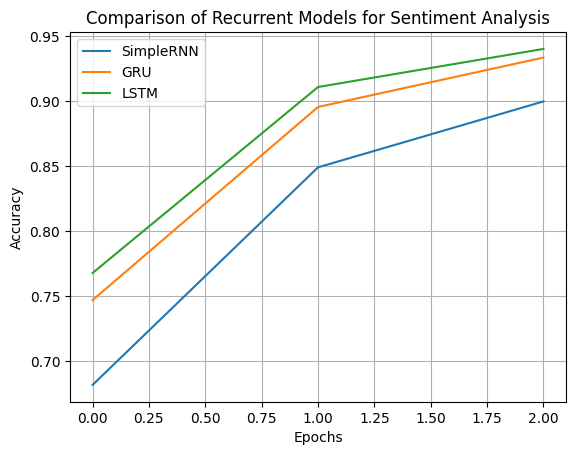

In [5]:
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()